# trim_saddle_points

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt

np.random.seed(0)
ps.visualization.set_mpl_style()

## Create image and variables

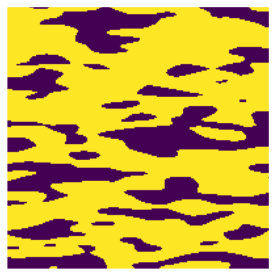

In [2]:
im = ps.generators.blobs(shape=[200, 200], blobiness=[2, .5], porosity=0.65)

plt.figure(figsize=[4, 4])
plt.axis(False)
plt.imshow(im);

## Apply filter function

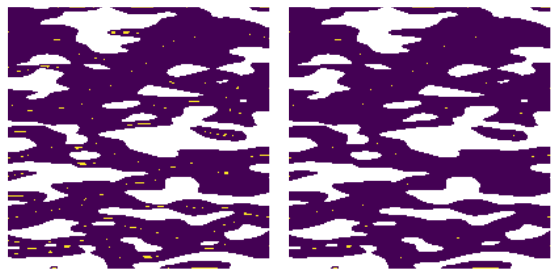

In [3]:
dt = edt(im)
peaks = ps.filters.find_peaks(dt, r_max=4)
x = ps.filters.trim_saddle_points(peaks=peaks, dt=dt)

fix, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].axis(False)
ax[0].imshow(peaks/im)
ax[1].axis(False)
ax[1].imshow(x/im);